### Implementing simple Chatbot Using Langgraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("GROQ_API_KEY")

In [6]:
from langchain_groq import ChatGroq
llm =ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("hello, i am Aswani")

AIMessage(content='Hello Aswani! Nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "hello, i am Aswani". We need to respond politely, greeting them, maybe ask how we can help. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 77, 'total_tokens': 134, 'completion_time': 0.116414831, 'prompt_time': 0.002994871, 'queue_time': 0.046316369, 'total_time': 0.119409702}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--95a5de72-5c1a-436c-8993-006cb9b14167-0', usage_metadata={'input_tokens': 77, 'output_tokens': 57, 'total_tokens': 134})

### We will start with Creting Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

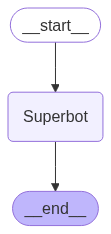

In [9]:
graph = StateGraph(State)

## node
graph.add_node("Superbot",superbot)

##Edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

## Compile the graph
graph_builder=graph.compile()

## View
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [10]:
graph_builder.invoke({"messages":"Hi , My name is Aswani and i like to explore ai agent field"})

{'messages': [HumanMessage(content='Hi , My name is Aswani and i like to explore ai agent field', additional_kwargs={}, response_metadata={}, id='caeca44f-cff7-43af-82a8-7d3a20321d62'),
  AIMessage(content='Hello Aswani! 👋\n\nIt’s great to meet someone who’s interested in the AI agent space. There’s a lot of exciting work happening—from chatbots and virtual assistants to autonomous agents that can plan, reason, and even act in the physical world.\n\n### Quick Overview of the AI Agent Landscape\n\n| Category | What It Is | Popular Tools / Frameworks | Typical Use‑Cases |\n|----------|------------|---------------------------|-------------------|\n| **Conversational Agents** | Text‑ or voice‑based bots that understand and generate language. | OpenAI GPT‑4/ChatGPT, Google Gemini, Microsoft Azure Bot Service, Rasa, LangChain | Customer support, personal assistants, tutoring |\n| **Planning & Decision‑Making Agents** | Agents that can reason about goals, constraints, and actions over multipl

### Streaming The responses

In [13]:
for event in graph_builder.stream({"messages":"Hello which language is good for learning?"},stream_mode="updates"):
    print(event)

{'Superbot': {'messages': [AIMessage(content='Hey there! 👋  \n\nChoosing a first language (whether it’s a spoken language or a programming language) depends a lot on **what you want to do with it**. Below are some quick recommendations for both scenarios, plus a short decision‑tree you can use to pick the one that fits you best.\n\n---\n\n## 1️⃣ If you’re talking about **spoken languages**\n\n| Goal | Best Language(s) to Start With | Why It Helps |\n|------|--------------------------------|--------------|\n| **Travel & Global Communication** | **Spanish**, **French**, **Mandarin Chinese** | Huge number of speakers, widely taught, lots of resources. |\n| **Career in Tech / Business** | **English** (if you’re not already fluent) | Dominates tech documentation, conferences, and multinational business. |\n| **Cultural Interest / Heritage** | **German**, **Japanese**, **Arabic**, **Portuguese**, etc. | Choose the culture you love most—motivation is key! |\n| **Cognitive Challenge / Linguist